In [34]:
import pandas as pd

In [60]:
data_hourly = pd.read_csv("../Data/merged_data.csv")

In [61]:
data_hourly

,datetime,Wädenswil (20cm),Wädenswil (40cm),Wädenswil (70cm),air_temperature,water_temperature,wind_gust_max_10min,wind_speed_avg_10min,wind_force_avg_10min,wind_direction,...,precipitation,global_radiation,change_rate,Pegel Zurichsee,Pegel Obersee,Abfluss Linth,Pegel Linth,Wasser_temp Linth,Abfluss Limmat,Pegel Limmat
0,2012-01-01 01:00:00+01:00,0.50,0.60,1.000,7.516667,5.9,4.783333,2.516667,2.516667,194.333333,...,0.1,0.0,0.000008,405.877,405.850,29.328,418.226,6.16,134.098,400.669
1,2012-01-01 02:00:00+01:00,0.60,0.70,1.000,7.333333,5.9,5.266667,3.266667,3.266667,179.666667,...,0.0,1.0,0.000016,405.883,405.855,29.543,418.231,6.17,143.515,400.732
2,2012-01-01 03:00:00+01:00,0.70,0.80,1.200,9.116667,5.9,6.316667,2.650000,2.650000,216.000000,...,0.0,9.0,0.000004,405.887,405.857,29.741,418.236,6.17,158.646,400.830
3,2012-01-01 04:00:00+01:00,0.80,0.80,1.200,9.716667,5.9,6.900000,2.900000,2.900000,216.000000,...,0.0,8.0,0.000016,405.891,405.858,30.058,418.243,6.18,165.654,400.874
4,2012-01-01 05:00:00+01:00,1.00,0.90,1.300,9.966667,5.9,8.050000,3.366667,3.366667,218.166667,...,0.0,2.0,0.000004,405.894,405.858,30.277,418.249,6.18,163.086,400.858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73844,2021-12-30 21:00:00+01:00,2.37,2.55,5.505,9.900000,NaN,1.883333,1.416667,1.333333,168.500000,...,0.0,0.0,0.000000,405.953,405.926,49.147,418.675,6.96,149.153,400.736
73845,2021-12-30 22:00:00+01:00,2.40,2.58,5.525,9.216667,NaN,2.500000,2.016667,2.000000,168.500000,...,0.0,0.0,0.000000,405.954,405.928,49.756,418.687,6.93,149.750,400.740
73846,2021-12-30 23:00:00+01:00,2.44,2.61,5.535,8.583333,NaN,2.366667,1.850000,2.000000,161.500000,...,0.0,0.0,0.000000,405.955,405.927,50.410,418.700,6.91,149.250,400.737
73847,2021-12-31 00:00:00+01:00,2.50,2.64,5.560,8.750000,NaN,2.250000,1.750000,1.666667,152.666667,...,0.0,0.0,0.000000,405.956,405.924,51.048,418.713,6.89,147.866,400.728


In [62]:
import pytz
#convert DateTime column into datetime format
data_hourly["datetime"] = pd.to_datetime(data_hourly['datetime'])
#function that converts datetime column into CET timezone and accounts for Daylight saving
def add_timezone(df):
    timeZone = pytz.timezone("CET")
    data_hourly['datetime'] = data_hourly['datetime'].dt.tz_convert(timeZone)
    return data

#add_timezone(data)

# set DateTime as index
data_hourly.set_index("datetime", inplace=True)

In [68]:
data_cleaned_hourly = data_hourly.loc[~data_hourly["water_level"].isna(),]
water_lev_hourly = data_cleaned_hourly[["water_level"]]

In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

In [71]:
register_matplotlib_converters()
sns.set_style("darkgrid")

In [72]:
plt.rc("figure", figsize=(16, 12))
plt.rc("font", size=13)

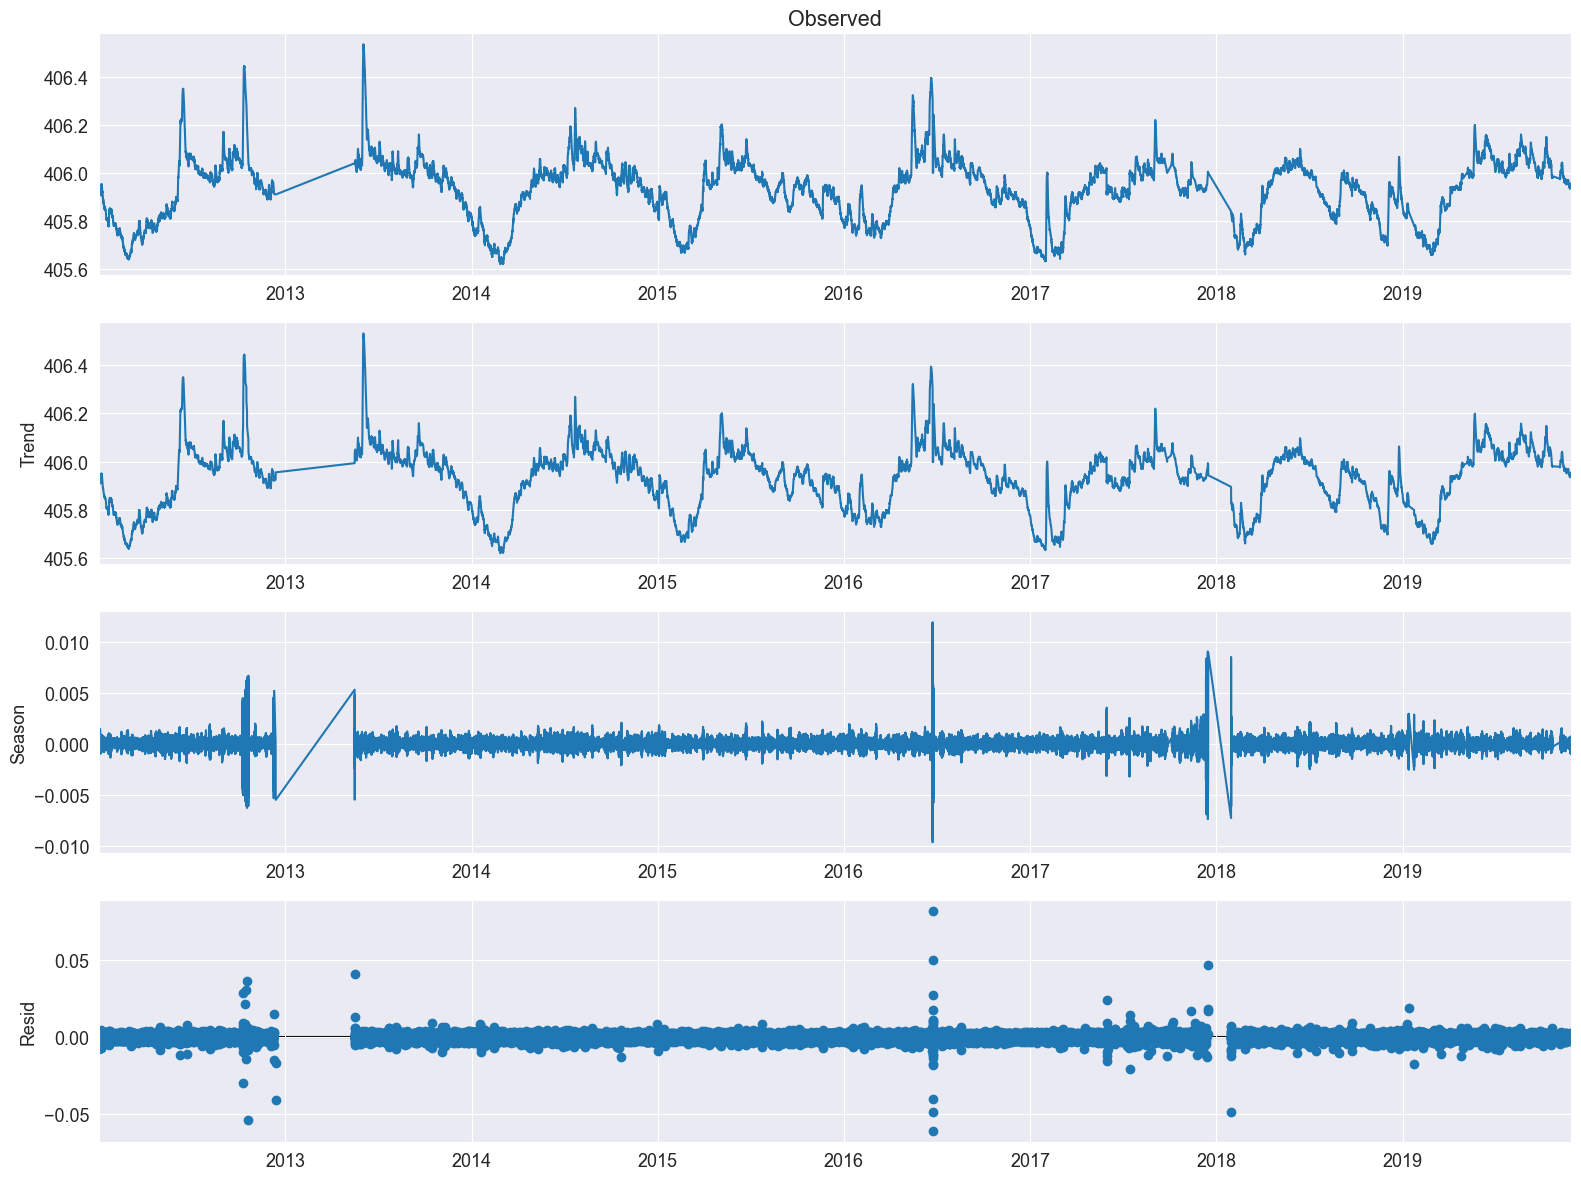

In [74]:
from statsmodels.tsa.seasonal import STL

stl = STL(water_lev_hourly, seasonal=13, period=3)
res = stl.fit()
fig = res.plot()

In [37]:
data = pd.read_csv("../Data/daily_data.csv")

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               2888 non-null   object 
 1   suction_tension (20cm)   2888 non-null   float64
 2   suction_tension (40cm)   2888 non-null   float64
 3   suction_tension (70cm)   2888 non-null   float64
 4   water_temperature        2888 non-null   float64
 5   barometric_pressure_qfe  2888 non-null   float64
 6   dew_point                2888 non-null   float64
 7   water_level              2888 non-null   float64
 8   inflow_linth (m3/s)      2888 non-null   float64
 9   outflow_limmat (m3/s)    2888 non-null   float64
 10  precipitation (mm)       2888 non-null   float64
 11  change_rate              2887 non-null   float64
 12  Evapotranspiration (mm)  2888 non-null   float64
dtypes: float64(12), object(1)
memory usage: 293.4+ KB


In [39]:
data.rename(columns={'Unnamed: 0':'datetime'}, inplace=True)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   datetime                 2888 non-null   object 
 1   suction_tension (20cm)   2888 non-null   float64
 2   suction_tension (40cm)   2888 non-null   float64
 3   suction_tension (70cm)   2888 non-null   float64
 4   water_temperature        2888 non-null   float64
 5   barometric_pressure_qfe  2888 non-null   float64
 6   dew_point                2888 non-null   float64
 7   water_level              2888 non-null   float64
 8   inflow_linth (m3/s)      2888 non-null   float64
 9   outflow_limmat (m3/s)    2888 non-null   float64
 10  precipitation (mm)       2888 non-null   float64
 11  change_rate              2887 non-null   float64
 12  Evapotranspiration (mm)  2888 non-null   float64
dtypes: float64(12), object(1)
memory usage: 293.4+ KB


In [45]:
import pytz
#convert DateTime column into datetime format
data["datetime"] = pd.to_datetime(data['datetime'])
#function that converts datetime column into CET timezone and accounts for Daylight saving
#def add_timezone(df):
    #timeZone = pytz.timezone("CET")
    #data['Unnamed: 0 '] = data['Unnamed: 0'].dt.tz_convert(timeZone)
    #return data

#add_timezone(data)

# set DateTime as index
data.set_index("datetime", inplace=True)

In [46]:
data_cleaned = data.loc[~data["water_level"].isna(),]
water_lev = data_cleaned[["water_level"]]

In [47]:
water_lev.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2888 entries, 2012-01-01 to 2019-11-27
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   water_level  2888 non-null   float64
dtypes: float64(1)
memory usage: 45.1 KB


In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

In [49]:
register_matplotlib_converters()
sns.set_style("darkgrid")

In [50]:
plt.rc("figure", figsize=(16, 12))
plt.rc("font", size=13)

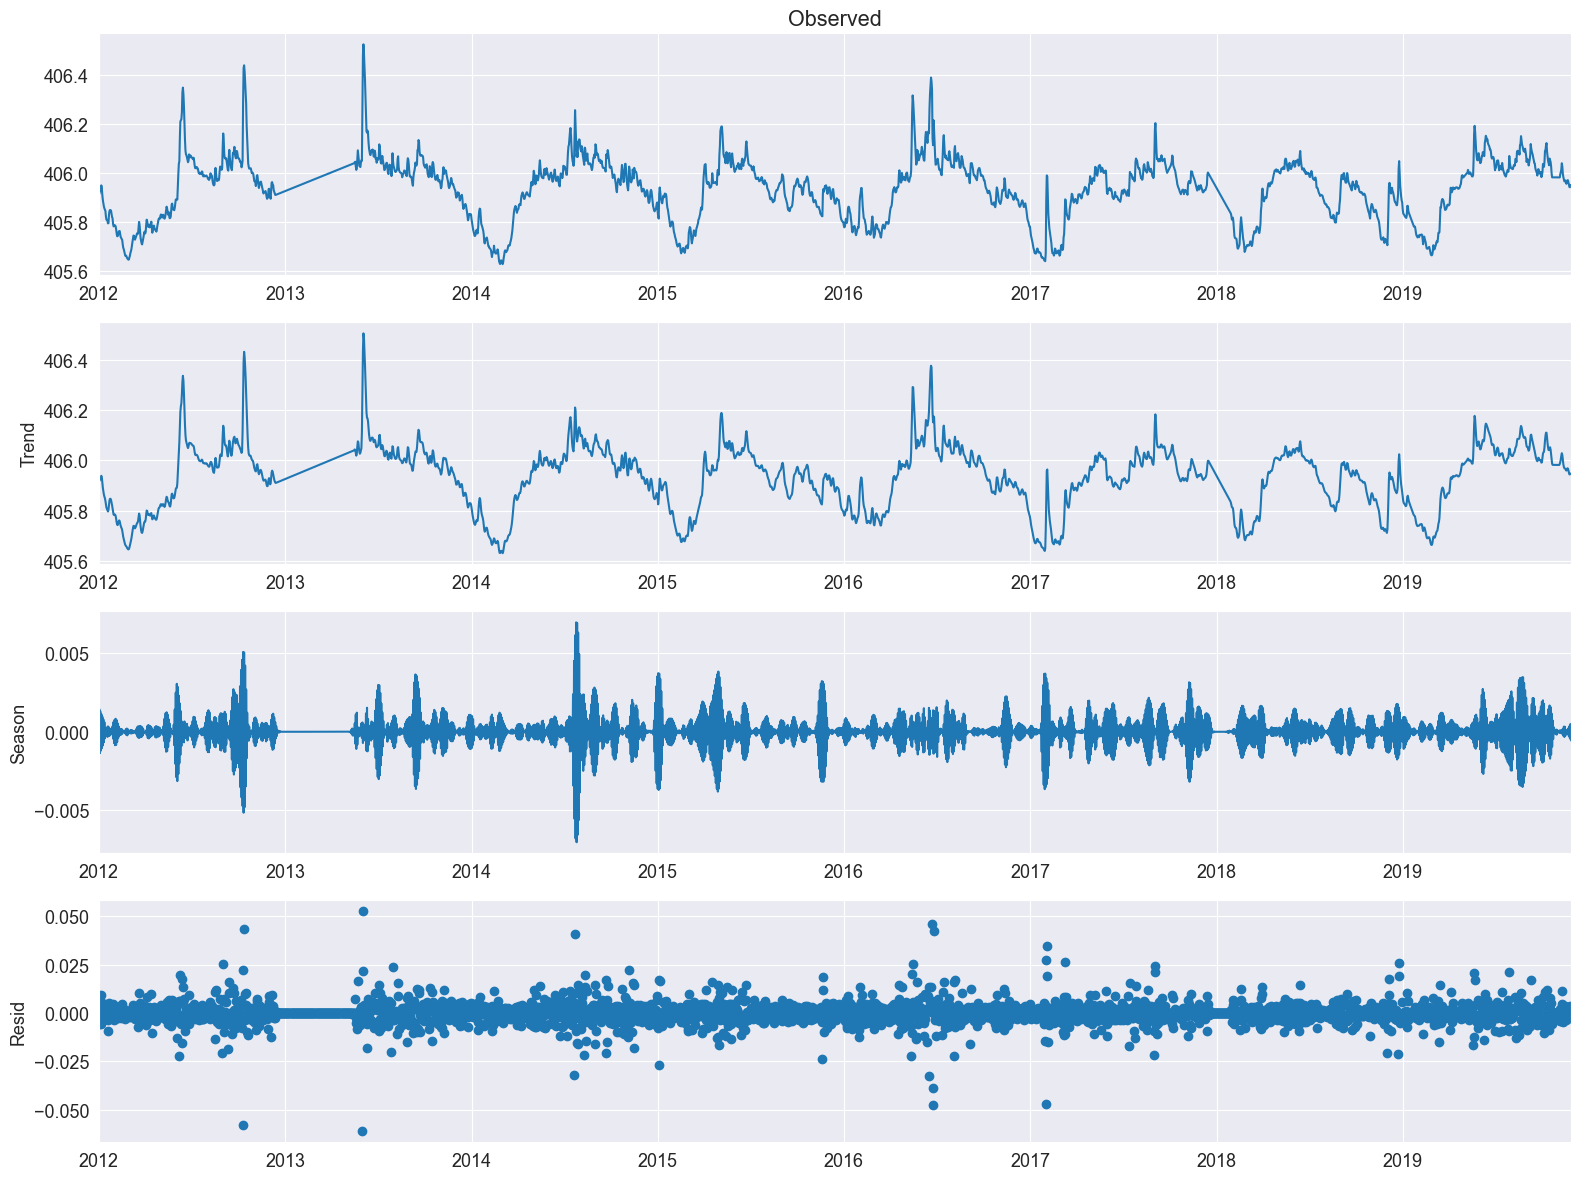

In [59]:
from statsmodels.tsa.seasonal import STL

stl = STL(water_lev, seasonal=13, period=2)
res = stl.fit()
fig = res.plot()

In [51]:
data_weekly = pd.read_csv("../Data/weekly_data.csv")

In [52]:
data_weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   datetime                 414 non-null    object 
 1   suction_tension (20cm)   414 non-null    float64
 2   suction_tension (40cm)   414 non-null    float64
 3   suction_tension (70cm)   414 non-null    float64
 4   water_temperature        414 non-null    float64
 5   barometric_pressure_qfe  414 non-null    float64
 6   dew_point                414 non-null    float64
 7   water_level              414 non-null    float64
 8   inflow_linth (m3/s)      414 non-null    float64
 9   outflow_limmat (m3/s)    414 non-null    float64
 10  precipitation (mm)       414 non-null    float64
 11  Evapotranspiration (mm)  414 non-null    float64
 12  change_rate              413 non-null    float64
dtypes: float64(12), object(1)
memory usage: 42.2+ KB


In [53]:
# import pytz package for handling timezones
import pytz
# convert DateTime column into datetime format
data_weekly["datetime"] = pd.to_datetime(data_weekly['datetime'], utc=True)
# function that converts datetime column into CET timezone and accounts for Daylight saving
def add_timezone(df):
    timeZone = pytz.timezone("CET")
    data_weekly['datetime'] = data_weekly['datetime'].dt.tz_convert(timeZone)
    return data_weekly

add_timezone(data_weekly)

# set DateTime as index
data_weekly.set_index("datetime", inplace=True)

In [54]:
data_cleaned_weekly = data_weekly.loc[~data_weekly["water_level"].isna(),]
water_lev_weekly = data_cleaned_weekly[["water_level"]]

In [55]:
register_matplotlib_converters()
sns.set_style("darkgrid")

In [56]:
plt.rc("figure", figsize=(16, 12))
plt.rc("font", size=13)

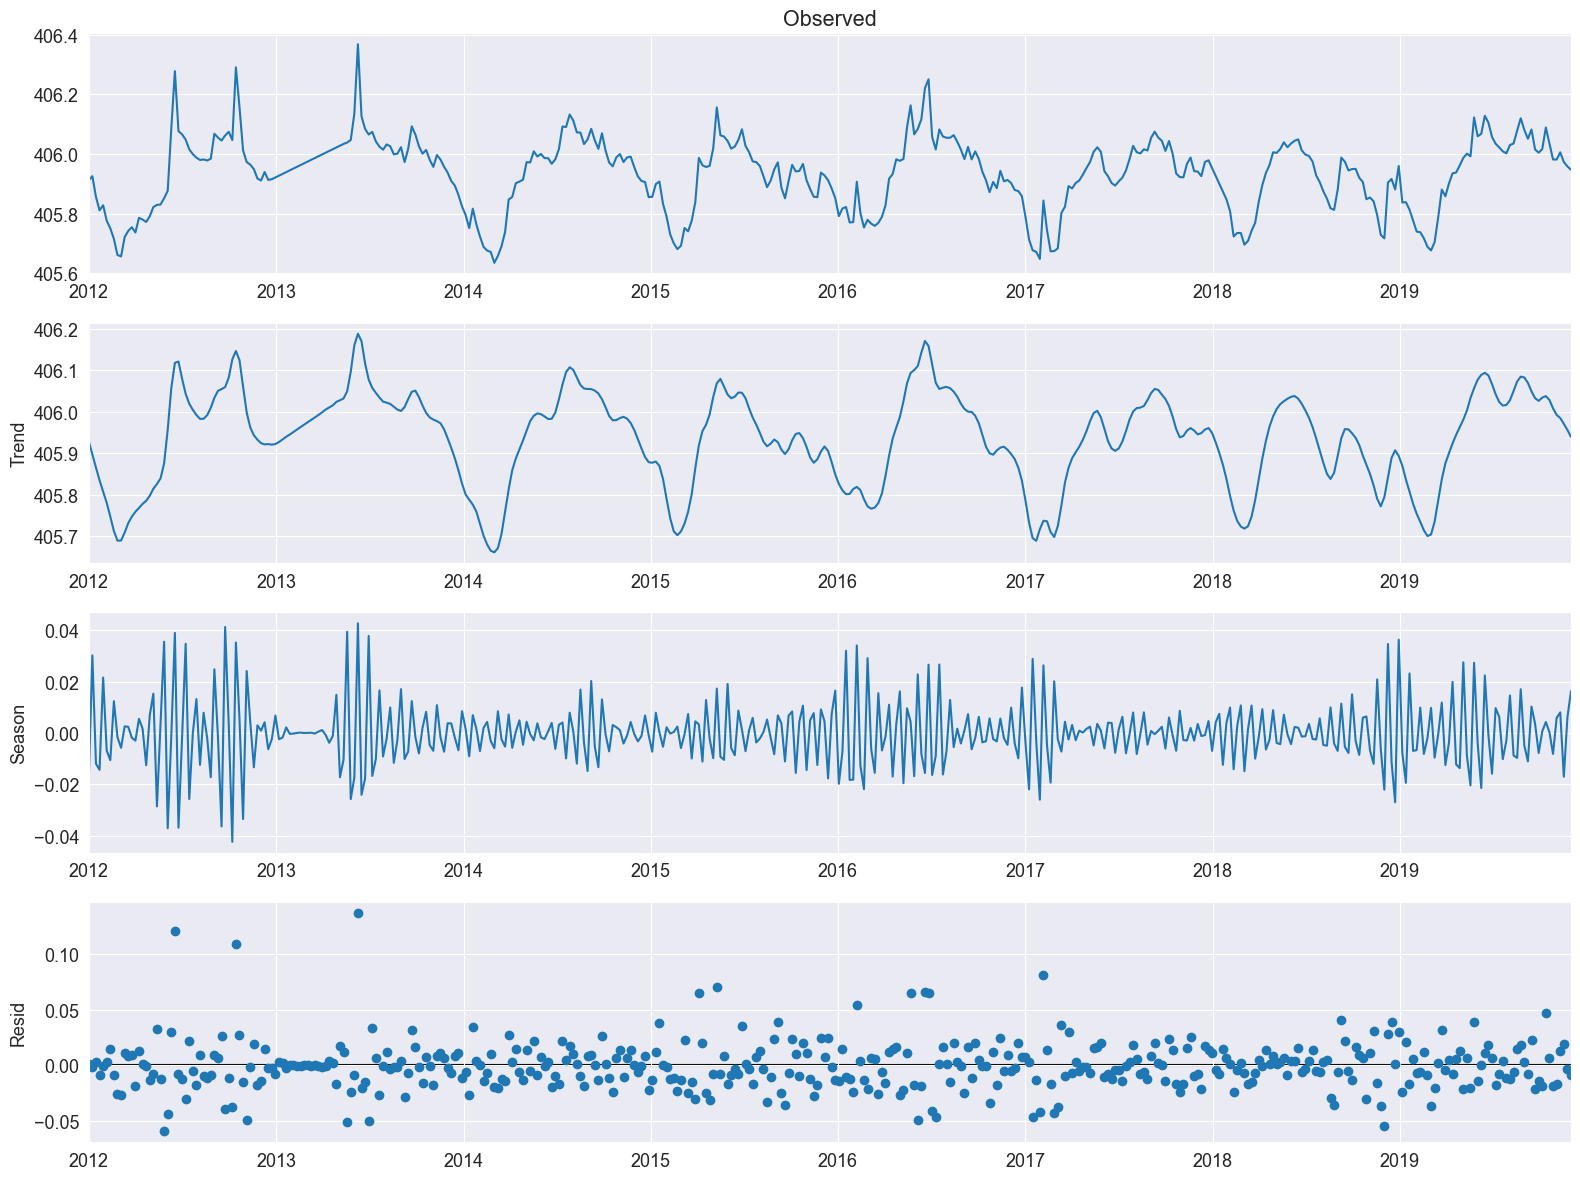

In [57]:
stl = STL(water_lev_weekly, seasonal=7, period=3)
res = stl.fit()
fig = res.plot()